In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
from model.optimization_model import OptimizationModel
import pyomo.environ as pyo
import pandas as pd

In [2]:
df = pd.read_csv('../data/joel_df.csv')

In [3]:
df = df[df['FECHAPEDIDO'].str.contains('2023')]
df = df.reset_index(drop=True)

CODIGO_PROD = 70130
data = df[df['CODIGO_NUM'] == CODIGO_PROD]
data.reset_index(drop=True, inplace=True)

data

,PRODUCT,FECHAPEDIDO,PURCHASING_HOSPITAL,PURCHASING_DEPARTMENT,NUMERO,REFERENCIA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,PRODUCTO,CODIGO_CLASS,CODIGO_NUM,YEAR,MONTH,DAYOFMONTH,DAYOFYEAR,CANTIDADCOMPRA
0,70130,2023-01-20,13,1.0,75480/23,187662,50,119.90,479.60,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,5.000000e-01,-7.907757e-01,0.337523,200
1,70130,2023-01-23,0,2.0,83392/23,187662,50,119.90,239.80,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,5.000000e-01,-9.987165e-01,0.385663,100
2,70130,2023-01-23,18,1.0,81455/23,187662,5,11.99,311.74,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,5.000000e-01,-9.987165e-01,0.385663,130
3,70130,2023-01-31,10,1.0,116416/23,187662,5,11.99,155.87,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,5.000000e-01,-2.449294e-16,0.508671,65
4,70130,2023-02-21,18,1.0,217120/23,187662,50,119.90,359.70,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,8.660254e-01,-8.978045e-01,0.780296,150
5,70130,2023-02-23,13,1.0,229260/23,187662,50,119.90,479.60,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,8.660254e-01,-9.987165e-01,0.801361,200
6,70130,2023-02-24,8,NaN,239697/23,187662,5,11.99,335.72,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,8.660254e-01,-9.884683e-01,0.811539,140
7,70130,2023-02-27,0,2.0,245181/23,187662,50,119.90,239.80,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,8.660254e-01,-7.247928e-01,0.840618,100
8,70130,2023-03-30,18,1.0,408050/23,187662,5,11.99,311.74,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,1.000000e+00,-2.012985e-01,0.999250,130
9,70130,2023-04-12,13,1.0,454038/23,187662,50,119.90,479.60,Compra menor,ALMACENABLE,APOSITO DE HIDROCOLOIDE-7,E,70130,2023,8.660254e-01,6.513725e-01,0.982927,200


In [22]:
model = OptimizationModel(data, 1.2, 4, 100000, 0.1)

In [23]:
solver_path = 'C:/Users/joels/Desktop/Uni/datathon 2023/winglpk-4.65/glpk-4.65/w64/glpsol.exe'
best_model = model.solve(solver_path)

if best_model is None:
    print('No solution found')
else:
    optimal_values = [pyo.value(best_model.p[i]) for i in best_model.p]
    print(f'Optimal values: {optimal_values}')
    print(f'Optimal cost: {pyo.value(best_model.objective())}')

100%|██████████| 495/495 [00:32<00:00, 15.10it/s]

Optimal values: [1458.0, 0, 0, 726.0, 0, 960.0, 0, 1476.0, 0, 0, 0, 0]
Optimal cost: 1513.5000000000005


In [11]:
df_heatmap = pd.DataFrame(columns=[3,4,5], index=[1.1,1.2,1.3])	
for beta in [1.1,1.2,1.3]:
    for Pmax in range(3,6):
        model = OptimizationModel(data=data, beta=beta, Pmax=Pmax, Cmax=100000, C=0.1)
        solver_path = 'C:/Users/joels/Desktop/Uni/datathon 2023/winglpk-4.65/glpk-4.65/w64/glpsol.exe'
        best_model = model.solve(solver_path)
        df_heatmap.loc[beta,Pmax] = pyo.value(best_model.objective())
        

100%|██████████| 792/792 [00:51<00:00, 15.35it/s]


In [18]:
# drop columns 'index','level_0'
df_heatmap.drop(['index','level_0'], axis=1, inplace=True)

In [42]:
df_heatmap
# change index to 1.1, 1.2, 1.3
df_heatmap.index = [1.1,1.2,1.3]

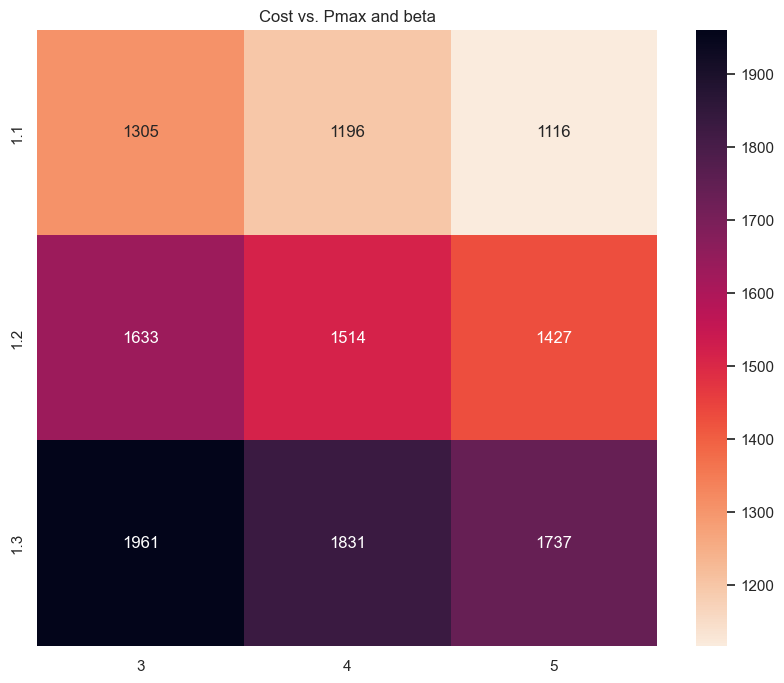

In [43]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(10,8))
plt.title('Cost vs. Pmax and beta')
plt.xlabel('Pmax')
plt.ylabel('beta')
sns.heatmap(df_heatmap, cmap='rocket_r', annot=True, fmt='.0f')
plt.savefig('heatmap.pdf')

In [40]:
print([pyo.value(best_model.p[i]) for i in best_model.p])
print([pyo.value(best_model.delta[i]) for i in best_model.delta])
print(best_model.xi)
print(best_model.v)
resum_output_df = pd.DataFrame.from_dict({
    'p': [pyo.value(best_model.p[i]) for i in best_model.p],
    'delta': [pyo.value(best_model.delta[i]) for i in best_model.delta],
    'xi': best_model.xi,
    'v': best_model.v
})
resum_output_df.index.name = 'MONTH'
resum_output_df.index += 1

resum_output_df.to_csv(f'../data/jan_df_{CODIGO_PROD}.csv')

[1458.0, 0, 0, 726.0, 0, 960.0, 0, 1476.0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[495, 590, 130, 200, 405, 475, 325, 670, 210, 350, 0, 0]
[495.0, 590.0, 130.0, 200.0, 405.0, 475.0, 325.0, 670.0, 210.0, 116.66666666666667, 116.66666666666667, 116.66666666666667]
